上一章我们学习 R 处理栅格数据的一般操作，

这节课我们学习，当栅格数据是离散时，我们应该如何处理。

## 目录

#### 1、离散值的栅格数据的概念
##### 如何绘制
##### 如何对离散值重新分类
##### 如何分图展示
#### 2、栅格数据焦点分析（focal analysis）
## 

#### 数据

我们使用美国土地植被数据，该数据提供2001-2019年植被覆盖情况

In [2]:
library(RColorBrewer) 
library(ggplot2)      
library(colorspace)
library(dplyr)
library(tidyr)
library(readr)
library(sf)
library(terra)

Warning message:
"程辑包'ggplot2'是用R版本4.2.3 来建造的"
Warning message:
"程辑包'dplyr'是用R版本4.2.3 来建造的"

载入程辑包：'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Warning message:
"程辑包'tidyr'是用R版本4.2.3 来建造的"
Warning message:
"程辑包'readr'是用R版本4.2.3 来建造的"
Warning message:
"程辑包'sf'是用R版本4.2.3 来建造的"
Linking to GEOS 3.9.3, GDAL 3.5.2, PROJ 8.2.1; sf_use_s2() is TRUE

Warning message:
"程辑包'terra'是用R版本4.2.3 来建造的"
terra 1.7.29


载入程辑包：'terra'


The following object is masked from 'package:tidyr':

    extract


The following object is masked from 'package:colorspace':

    RGB




#### 导入数据

In [3]:
setwd("C:/Users/77387/Desktop/Data_analysis_courses/RandSpecialAnalysis/Chapter7/")

In [4]:
nlcd19 <- rast("NLCD_2019_Land_Cover_Walton.tiff")
class(nlcd19)

[1] "SpatRaster"
attr(,"package")
[1] "terra"

In [5]:
source("rasterdf.R")
nlcd19_df <- rasterdf(nlcd19)

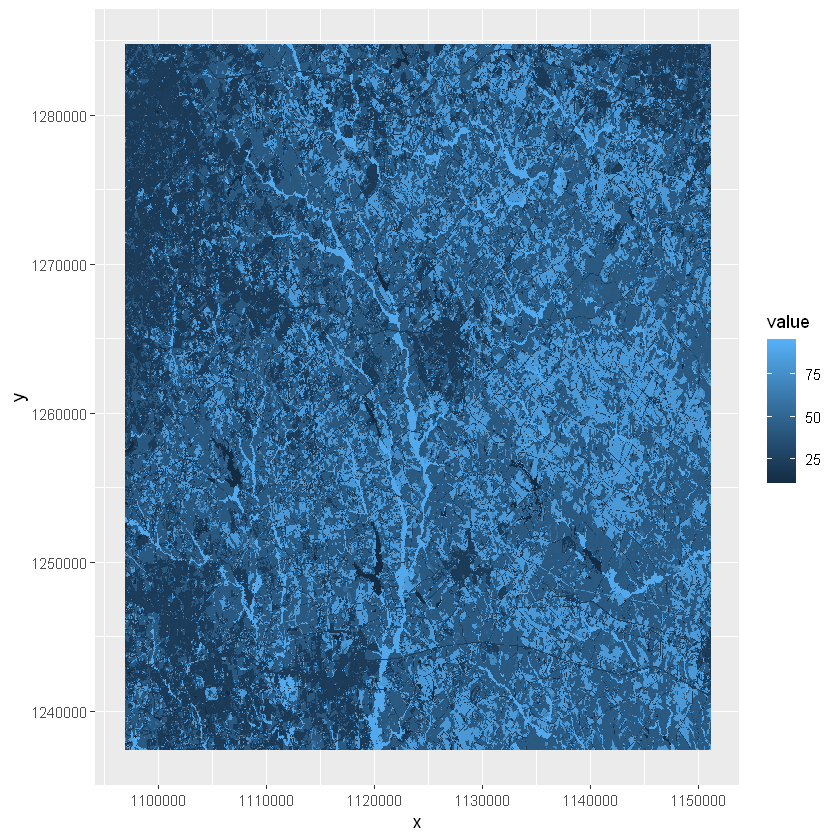

In [6]:
# 对数据进行可视化
ggplot(data = nlcd19_df) +
  geom_raster(aes(x = x, 
                  y = y, 
                  fill = value))

该地图不同数值有不同代表，11代表水源， 21代表低密度的住宅，等等

In [7]:
LCcodes <- unique(nlcd19)[, 1]
LCcodes

[1] 11 21 22 23 24 31 41 42 43 52 71 81 82 90 95

我们生成一个新的向量，里面不再是数值，而是字符的形式

In [8]:
LCnames <-c(
  "Water",
  "DevelopedOpen",
  "DevelopedLow",
  "DevelopedMed",
  "DevelopedHigh",
  "Barren",
  "DeciduousForest",
  "EvergreenForest",
  "MixedForest",
  "ShrubScrub",
  "GrassHerbaceous",
  "PastureHay",
  "CultCrops",
  "WoodyWetlands",
  "EmergentHerbWet")

#### coltab() 从 SpatRaster 提取颜色板

In [9]:
nlcdcols <- data.frame(coltab(nlcd19))# 提取调色板后

In [10]:
nlcdcols <- nlcdcols[LCcodes + 1,]

In [11]:
LCcolors <- rgb(red = nlcdcols$red,
                green = nlcdcols$green,
                blue = nlcdcols$blue,
                names = as.character(LCcodes),
                maxColorValue = 255)
LCcolors

11        21        22        23        24        31        41        42 
"#466B9F" "#DEC5C5" "#D99282" "#EB0000" "#AB0000" "#B3AC9F" "#68AB5F" "#1C5F2C" 
       43        52        71        81        82        90        95 
"#B5C58F" "#CCB879" "#DFDFC2" "#DCD939" "#AB6C28" "#B8D9EB" "#6C9FB8"

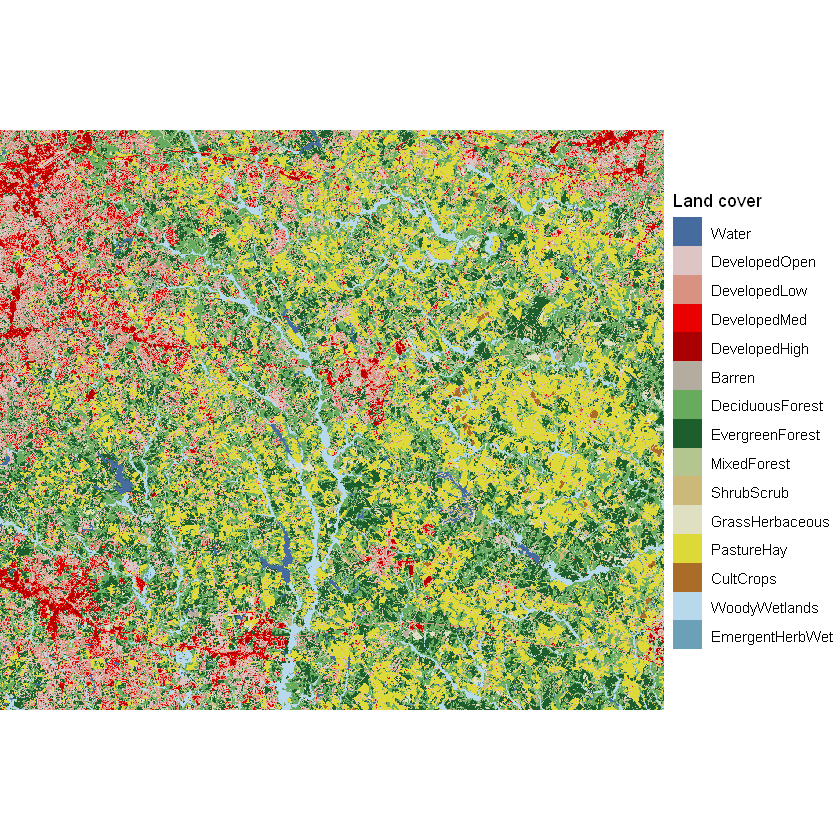

In [12]:
ggplot(data = nlcd19_df) +
  geom_raster(aes(x = x, 
                  y = y, 
                  fill = as.character(value))) + 
  scale_fill_manual(name = "Land cover",
                    values = LCcolors,
                    labels = LCnames,
                    na.translate = FALSE) +
  coord_sf(expand = FALSE) +
  theme_void()

#### 使用设定 xlim， ylim 来实现 zoom in

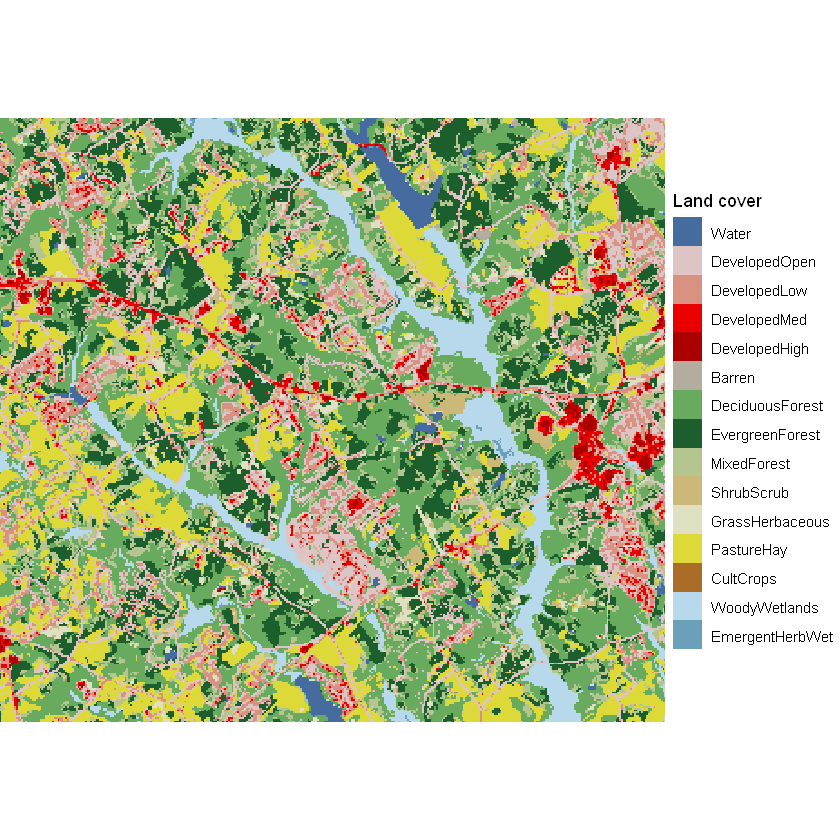

In [13]:
ggplot(data = nlcd19_df) +
  geom_raster(aes(x = x, 
                  y = y, 
                  fill = as.character(value))) + 
  scale_fill_manual(name = "Land cover",
                    values = LCcolors,
                    labels = LCnames,
                    na.translate = FALSE) +
  coord_sf(expand = FALSE, 
           xlim = c(1114000, 1125000), 
           ylim = c(1260000, 1270000)) + 
  theme_void()

#### 重归类，使简单化

In [14]:
newclas <- c(1, 2, 2, 2, 2, 3, 4, 4, 4, 5, 5, 5, 6, 7, 7)
lookup <- data.frame(LCcodes, newclas)
nlcd19_rc <- classify(nlcd19, lookup)
newnames <- c("Water",
               "Developed",
               "Barren",
               "Forest",
               "GrassShrub",
               "Cropland",
               "Wetland")
newcols <- c("mediumblue", 
             "firebrick2", 
             "gray60", 
             "darkgreen", 
             "yellow2", 
             "orange4", 
             "paleturquoise2")


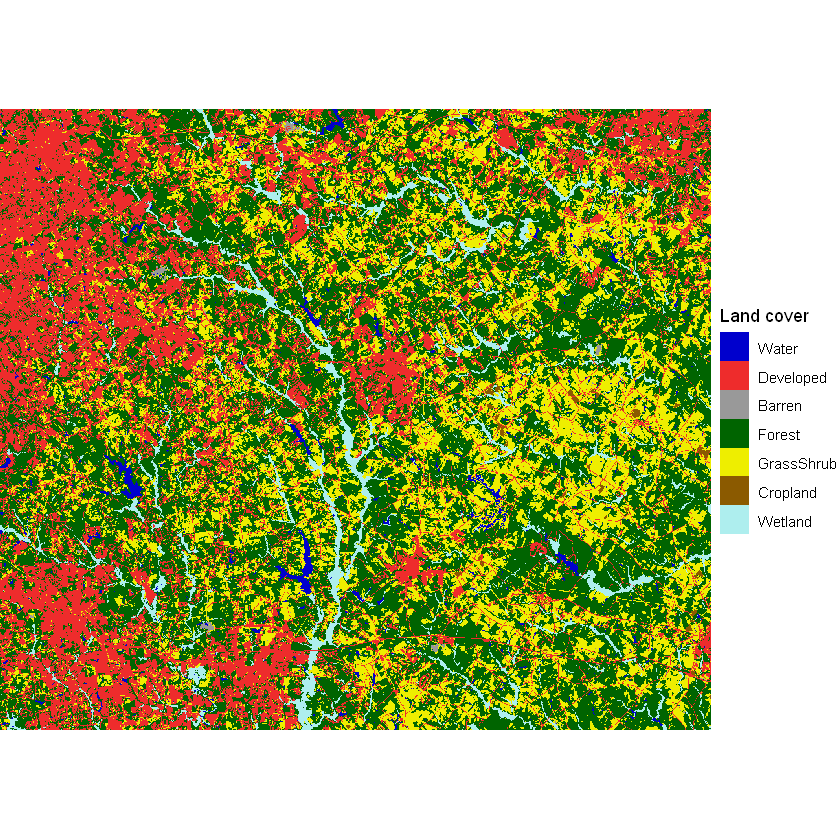

In [15]:
nlcd19_rc_df <- rasterdf(nlcd19_rc)

ggplot(data = nlcd19_rc_df) +
  geom_raster(aes(x = x, y = y, fill = as.character(value))) + 
  scale_fill_manual(name = "Land cover",
                    values = newcols,
                    labels = newnames,
                    na.translate = FALSE) +
  coord_sf(expand = FALSE) +
  theme_void()

#### segregate() 把一层分成多层

In [16]:
nlcd19_stk <- segregate(nlcd19_rc)

In [17]:
nlcd19_stk <- nlcd19_stk[[-1]]
names(nlcd19_stk) <- newnames[-1]

转化成 tidy dataframe

In [18]:
nlcd19_stk_df <- rasterdf(nlcd19_stk)
summary(nlcd19_stk_df)

       x                 y               value              variable      
 Min.   :1096830   Min.   :1237410   Min.   :0.0000   Developed :2856411  
 1st Qu.:1110390   1st Qu.:1249230   1st Qu.:0.0000   Barren    :2856411  
 Median :1123950   Median :1261080   Median :0.0000   Forest    :2856411  
 Mean   :1123950   Mean   :1261080   Mean   :0.1645   GrassShrub:2856411  
 3rd Qu.:1137510   3rd Qu.:1272930   3rd Qu.:0.0000   Cropland  :2856411  
 Max.   :1151070   Max.   :1284750   Max.   :1.0000   Wetland   :2856411  

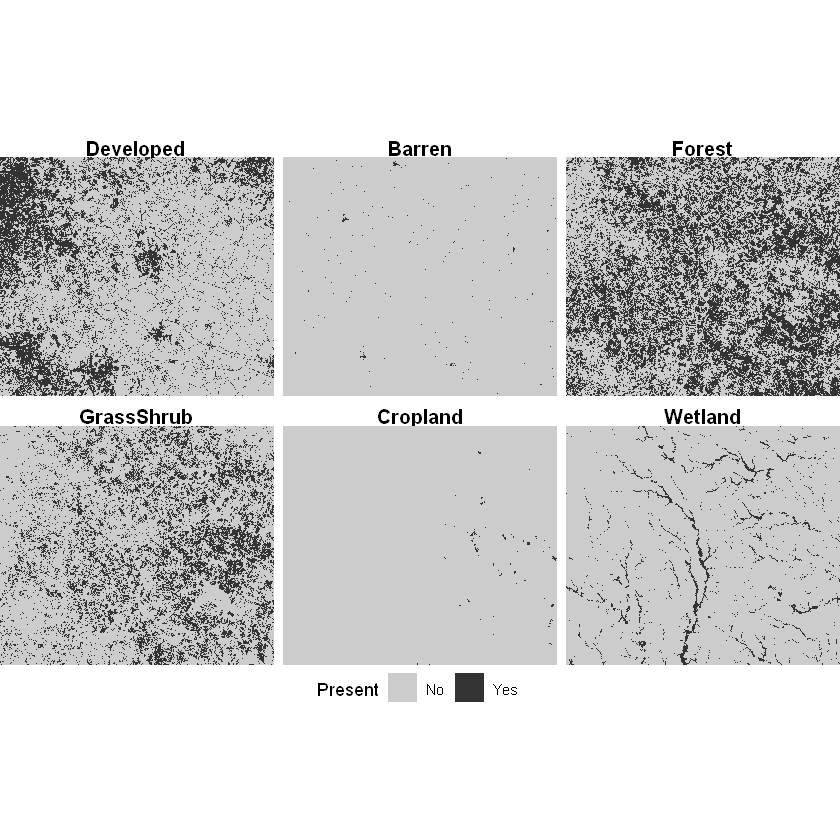

In [19]:
ggplot(data = nlcd19_stk_df) +
  geom_raster(aes(x = x, 
                  y = y, 
                  fill = as.character(value))) +
  scale_fill_manual(name = "Present", 
                    values = c("gray80", "gray20"),
                    labels = c("No", "Yes"),
                    na.translate = FALSE) +  
  facet_wrap(facets = vars(variable), ncol = 3) +
  coord_sf(expand = FALSE) +
  theme_void() +
  theme(strip.text.x = element_text(size=12, face="bold"),
        legend.position="bottom")

## 栅格数据焦点分析（focal analysis）

焦点分析计算窗口内一个 cell 环绕周围的所有 cell， 并给这个 cell 重新赋值，这个过程遍历所有的 cell，直到所有cell都有焦点分析的重新赋值。该过程可以达到对整张数据平滑的效果。
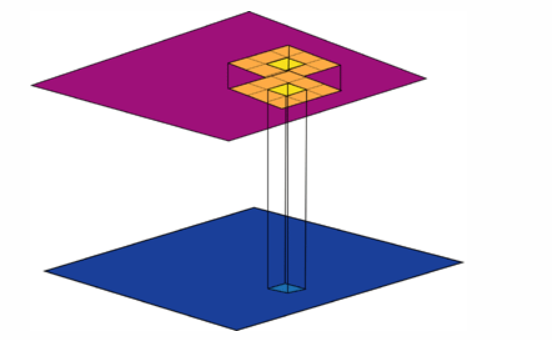

我们设定100m 到 2000m 直径的圆遍历每个cell 实现焦点分析

focalMat（）返回weight matrix（circle大小）

In [20]:
forest <- nlcd19_stk[["Forest"]]
fwts100 <- focalMat(forest, d=100, type = "circle")
fwts500 <- focalMat(forest, d=500, type = "circle")
fwts1000 <- focalMat(forest, d=1000, type = "circle")
fwts2000 <- focalMat(forest, d=2000, type = "circle")

使用focal函数，取 weight matrix 对窗口内加权求和遍历一遍

In [21]:
for_100 <- focal(forest, w=fwts100, fun=sum)
for_500 <- focal(forest, w=fwts500, fun=sum)
for_1000 <- focal(forest, w=fwts1000, fun=sum)
for_2000 <- focal(forest, w=fwts2000, fun=sum)
focal_stk <- c(for_100, for_500, for_1000, for_2000)
names(focal_stk) <- c("100m", "500m", "1000m", "2000m")

#### 可视化

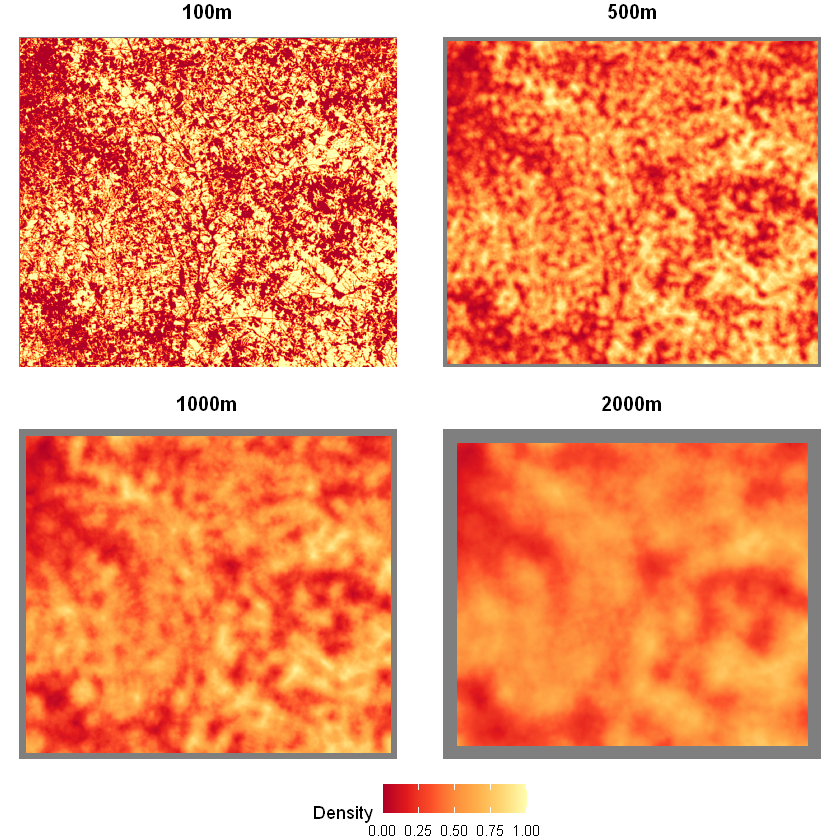

In [22]:
focal_stk_df <- rasterdf(focal_stk)

ggplot(data = focal_stk_df) +
  geom_raster(aes(x = x, 
                  y = y, 
                  fill = value)) +
  scale_fill_distiller(name = "Density", 
                       palette = "YlOrRd") +
  facet_wrap(facets = vars(variable), ncol = 2) +
  coord_sf(expand = TRUE) +
  theme_void() +
  theme(strip.text.x = element_text(size=12, face="bold"),
        legend.position="bottom")